## <font color='#ff6600'> Nitrogen Dioxide (NO2) and Weather Co-relation Study for the City of Austin, Texas</font>

<b> Findings for the City of Austin: </b>
    
    Based on the nitrogen dioxide and weather data from 2015 to 2019, we can see that the weather conditions does impact 
    nitrogen dioxide level specifically minimum temperature and wind speed.
    
    Following inferences can be made from the regression model used:
        
        1. A decrease in Min temperature, wind speed, cloud cover, humidity increases the nitrogen dioxide level.
        2. An decrease in pressure decreases the nitrogen dioxide level.
    
    Although based on the correlation matrix, the correlation between weather parameters and nitrogen dioxide doesn't 
    seem to be very strong but based on the Null Hypothesis, we can conclude that weather parameters like Min Temperature,
    Wind Speed, Pressure and Cloud Cover does have an impact on nitrogen dioxide and we cannot ignore them. 

In [1]:
# importing dependencies 

import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading the csv files created in data_cleaning_and_merging module
combined_no2_weather_data = pd.read_csv('../data/combined_no2_weather_data.csv')

In [3]:
# checking for null values
combined_no2_weather_data.isnull().sum()

date_local       0
avgtempC         0
winddirDegree    0
windspeedKmph    0
cloudcover       0
humidity         0
precipInches     0
pressure         0
visibility       0
maxtempC         0
mintempC         0
sunHour          0
NO2              0
dtype: int64

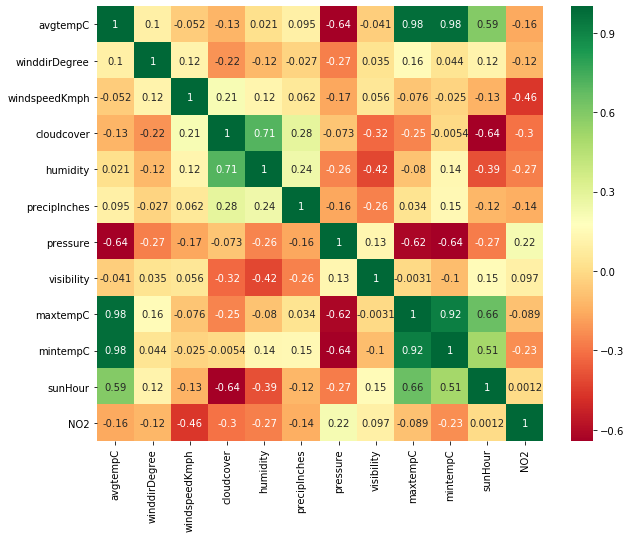

In [4]:
# graphical representation of correlation
corrmat = combined_no2_weather_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,8))
#plot heat map
g = sns.heatmap(combined_no2_weather_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [5]:
combined_no2_weather_data.columns

Index(['date_local', 'avgtempC', 'winddirDegree', 'windspeedKmph',
       'cloudcover', 'humidity', 'precipInches', 'pressure', 'visibility',
       'maxtempC', 'mintempC', 'sunHour', 'NO2'],
      dtype='object')

In [6]:
# selecting the independent and dependent features

X = combined_no2_weather_data[['winddirDegree', 'windspeedKmph','cloudcover', 'humidity', 'pressure', 'mintempC']] ## independent features
y = combined_no2_weather_data['NO2'] ## dependent features

#### Feature Importance

In [7]:
# feature selection
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [8]:
X.head()

,winddirDegree,windspeedKmph,cloudcover,humidity,pressure,mintempC
0,70,13,98,87,1025,1
1,137,13,99,89,1019,4
2,277,11,35,78,1016,3
3,218,17,2,67,1030,2
4,93,10,1,56,1036,-2


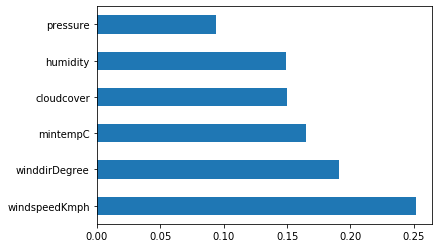

In [9]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Linear Regression

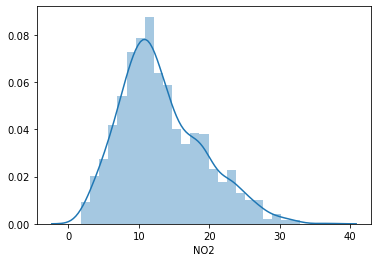

In [10]:
sns.distplot(y)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# creating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# creating an instance of linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# coefficient - slope values (m from y=mx+b) for all the independent features and y-intercept
print('coefficients: ', lm.coef_)
print('intercept: ', lm.intercept_)

coefficients:  [-0.01397955 -0.49463103 -0.03886376 -0.03024237 -0.12887108 -0.22641705]
intercept:  160.38270196033142


In [16]:
# R squared score for the training data 
print("Coefficient of determination R^2 <-- on train set: {}".format(lm.score(X_train, y_train)))

# R squared score for the test data. The closer the score is to 1 the better is the model
print("Coefficient of determination R^2 <-- on test set: {}".format(lm.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.32481735056541006
Coefficient of determination R^2 <-- on test set: 0.34017367272290544


#### Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lm, X, y, cv=5)

In [18]:
# this is generlized way of finding R squared score
score.mean()

0.27719848124402413

#### Predictions

In [19]:
predictions = lm.predict(X_test)

In [20]:
combined_no2_weather_data.head(1)

,date_local,avgtempC,winddirDegree,windspeedKmph,cloudcover,humidity,precipInches,pressure,visibility,maxtempC,mintempC,sunHour,NO2
0,2015-01-01,2,70,13,98,87,0.2,1025,10,4,1,3.8,9.175


In [21]:
# Predciting NO2 value (in ppm) based on temperature (Celsius), humidity and cloud cover
lm.predict([[70, 13, 98, 87, 1025, 1]])

array([14.21492066])

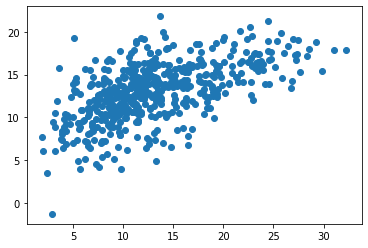

In [22]:
plt.scatter(y_test, predictions)

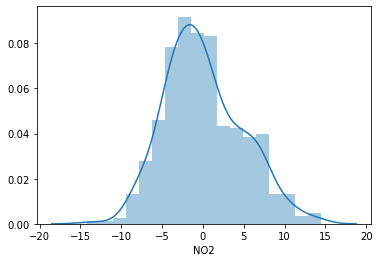

In [23]:
sns.distplot(y_test-predictions)

In [24]:
from sklearn import metrics

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.808566295660018
MSE: 22.652081780440717
RMSE: 4.759420319791132


#### Hypothesis testing

In [26]:
import scipy
import statsmodels.api as sm

# Fit regression model
results = sm.OLS(y, X).fit()

# Inspect the results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    NO2   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                              2284.
Date:                Mon, 27 Jan 2020   Prob (F-statistic):                        0.00
Time:                        17:45:00   Log-Likelihood:                         -5189.3
No. Observations:                1734   AIC:                                  1.039e+04
Df Residuals:                    1728   BIC:                                  1.042e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

### Lasso Regression

In [27]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [28]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X,y)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-24.14922081405282


In [29]:
prediction_lasso = lasso_regressor.predict(X_test)

In [30]:
# Predciting ozone value (in ppm) based on temperature (Celsius), humidity and cloud cover
lasso_regressor.predict([[70, 13, 98, 87, 1025, 1]])

array([14.21859129])

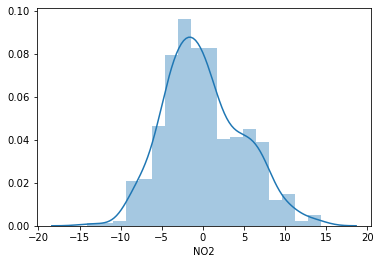

In [31]:
sns.distplot(y_test - prediction_lasso)

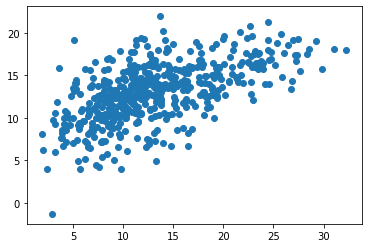

In [32]:
plt.scatter(y_test, prediction_lasso)

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_lasso))
print('MSE:', metrics.mean_squared_error(y_test, prediction_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lasso)))

MAE: 3.804208619512051
MSE: 22.527291704654612
RMSE: 4.746292416682164


### Ridge Regression

In [34]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [35]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X,y) 

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [36]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-24.148707604867145
